In [1]:
from configuration.make_quam import qpu
from qm import QuantumMachinesManager, QuantumMachine
from qualang_tools.octave_tools import calibration_result_plotter as plotter

2024-10-22 16:03:38,038 - qm - INFO     - Starting session: b25e8fbe-32d2-47ff-8cf0-a7748adae365


In [2]:
qmm = QuantumMachinesManager(
    host="172.16.33.101",
    cluster_name="Cluster_81",
    octave=qpu.octaves["octave1"].get_octave_config(),
)

qm = qmm.open_qm(qpu.generate_config())

2024-10-22 16:03:40,306 - qm - INFO     - Performing health check


/Users/paul/miniconda3/envs/QM/lib/python3.11/site-packages/qm/quantum_machines_manager.py:102: DeprecationWarning: QMM was opened with OctaveConfig. Please note that from QOP2.4.0 the octave devices are managed by the cluster setting in the QM-app. It is recommended to remove the OctaveConfig from the QMM instantiation.
  warnings.warn(


2024-10-22 16:03:40,668 - qm - WARNING  - Health check warning: Inter-OPX connectivity issues in OPX: con1. Missing ports are: 4, 3, 2, 1, 12, 11, 10, 9. See QM-App for more info.
2024-10-22 16:03:40,668 - qm - WARNING  - Health check warning: Inter-OPX connectivity issues in OPX: con2. Missing ports are: 4, 3, 2, 1, 12, 11, 10, 9. See QM-App for more info.
2024-10-22 16:03:40,669 - qm - INFO     - Health check passed
2024-10-22 16:03:42,824 - qm - INFO     - Octave "octave1" Health check passed, current temperature 60


In [3]:
# qm.calibrate_element("resonator", lo_if_dict={qpu.channels["resonator"].LO_frequency: (qpu.channels["resonator"].intermediate_frequency)})
cal_output = qm.calibrate_element("resonator")

2024-10-22 16:03:46,189 - qm - INFO     - Compiling program


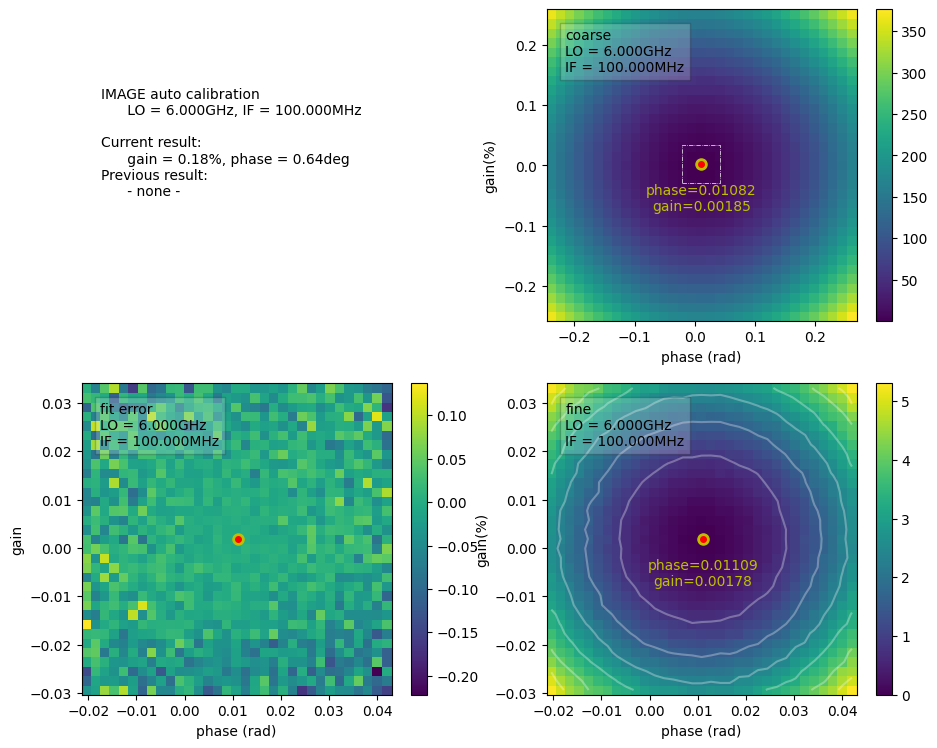

In [6]:
plotter.show_if_result(cal_output)